In [2]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

print("TIME SERIES & RISK MODELING")
print("Advanced Finance Skills: VaR, Sharpe Ratios, Predictive Models")

# Load data from phase 2 analysis
analysis_df = pd.read_csv(r"C:\Users\Abhin\OneDrive\Documents\[01] Projects\Portfolio projects\Finanace_Economics_dataset_2000_to_Present\archive (1)\phase2_analysis_data.csv", index_col=0, parse_dates=True)
correlation_matrix = pd.read_csv(r"C:\Users\Abhin\OneDrive\Documents\[01] Projects\Portfolio projects\Finanace_Economics_dataset_2000_to_Present\archive (1)\phase2_correlation_matrix.csv", index_col=0)

print(f"\nLoaded analysis data: {analysis_df.shape}")
print(f"Loaded correlation matrix: {correlation_matrix.shape}")
print(f"Date range: {analysis_df.index.min()} to {analysis_df.index.max()}")

# Quick data check
print("\nData Preview:")
print(analysis_df.head(3))

TIME SERIES & RISK MODELING
Advanced Finance Skills: VaR, Sharpe Ratios, Predictive Models

Loaded analysis data: (307, 6)
Loaded correlation matrix: (6, 6)
Date range: 2000-02-29 00:00:00 to 2025-08-31 00:00:00

Data Preview:
            SP500_Returns  NASDAQ_Returns  VIX_Level  Unemployment_Rate  \
2000-02-29      -2.010808       19.194737      23.37                4.1   
2000-03-31       9.671983       -2.637174      24.11                4.0   
2000-04-30      -3.079576      -15.573948      26.20                3.8   

            Fed_Funds_Rate  Treasury_10Y  
2000-02-29            5.73          6.42  
2000-03-31            5.85          6.03  
2000-04-30            6.02          6.23  


In [3]:
print("\nRISK METRICS CALCULATION")
print("Calculating industry-standard risk measures...")

def calculate_risk_metrics(returns_series, name):

    # Remove any missing values
    returns = returns_series.dropna()
    
    # Basic statistics
    mean_return = returns.mean()
    volatility = returns.std()
    
    # Annualized metrics (convert monthly to yearly)
    annual_return = mean_return * 12
    annual_volatility = volatility * np.sqrt(12)
    
    # Sharpe Ratio (risk-adjusted return) - assuming 2% risk-free rate
    risk_free_rate = 2.0  # 2% annual risk-free rate
    sharpe_ratio = (annual_return - risk_free_rate) / annual_volatility
    
    # Downside risk metrics
    negative_returns = returns[returns < 0]
    downside_volatility = negative_returns.std() * np.sqrt(12)
    sortino_ratio = (annual_return - risk_free_rate) / downside_volatility if len(negative_returns) > 0 else np.nan
    
    # Value at Risk (VaR) - 95% confidence level
    var_95 = np.percentile(returns, 5)  # 5th percentile = 95% VaR
    var_99 = np.percentile(returns, 1)  # 1st percentile = 99% VaR
    
    # Expected Shortfall (average loss beyond VaR)
    es_95 = returns[returns <= var_95].mean() if len(returns[returns <= var_95]) > 0 else np.nan
    
    # Maximum Drawdown (largest peak-to-trough loss)
    cumulative_returns = (1 + returns/100).cumprod()  # Convert % to cumulative wealth
    rolling_max = cumulative_returns.expanding().max()
    drawdowns = (cumulative_returns - rolling_max) / rolling_max * 100
    max_drawdown = drawdowns.min()
    
    # Skewness and Kurtosis (distribution shape)
    skewness = stats.skew(returns)
    kurtosis = stats.kurtosis(returns)
    
    return {
        'Asset': name,
        'Annual_Return_Pct': annual_return,
        'Annual_Volatility_Pct': annual_volatility,
        'Sharpe_Ratio': sharpe_ratio,
        'Sortino_Ratio': sortino_ratio,
        'VaR_95_Pct': var_95,
        'VaR_99_Pct': var_99,
        'Expected_Shortfall_95_Pct': es_95,
        'Max_Drawdown_Pct': max_drawdown,
        'Skewness': skewness,
        'Kurtosis': kurtosis,
        'Total_Observations': len(returns)
    }

# Calculate risk metrics for both market indices
sp500_metrics = calculate_risk_metrics(analysis_df['SP500_Returns'], 'S&P 500')
nasdaq_metrics = calculate_risk_metrics(analysis_df['NASDAQ_Returns'], 'NASDAQ')

# Combine into a comparison table
risk_metrics_df = pd.DataFrame([sp500_metrics, nasdaq_metrics])
risk_metrics_df = risk_metrics_df.set_index('Asset')

print("COMPREHENSIVE RISK ANALYSIS:")
print(risk_metrics_df.round(3))

# Interpret the key metrics
print("\nKEY INSIGHTS:")

print(f"\nHigher Returns: {risk_metrics_df['Annual_Return_Pct'].idxmax()}")
print(f"Lower Risk: {risk_metrics_df['Annual_Volatility_Pct'].idxmin()}")  
print(f"Best Risk-Adjusted Returns (Sharpe): {risk_metrics_df['Sharpe_Ratio'].idxmax()}")
print(f"Worst Maximum Drawdown: {risk_metrics_df['Max_Drawdown_Pct'].idxmin()}")

# VaR interpretation
for asset in ['S&P 500', 'NASDAQ']:
    var_95 = risk_metrics_df.loc[asset, 'VaR_95_Pct']
    print(f"\n{asset} VaR: 95% chance monthly loss won't exceed {abs(var_95):.1f}%")


RISK METRICS CALCULATION
Calculating industry-standard risk measures...
COMPREHENSIVE RISK ANALYSIS:
         Annual_Return_Pct  Annual_Volatility_Pct  Sharpe_Ratio  \
Asset                                                             
S&P 500              7.176                 15.221         0.340   
NASDAQ               9.030                 21.672         0.324   

         Sortino_Ratio  VaR_95_Pct  VaR_99_Pct  Expected_Shortfall_95_Pct  \
Asset                                                                       
S&P 500          0.469      -7.975     -10.894                     -9.713   
NASDAQ           0.439     -10.054     -16.899                    -13.951   

         Max_Drawdown_Pct  Skewness  Kurtosis  Total_Observations  
Asset                                                              
S&P 500           -52.556    -0.503     0.796                 307  
NASDAQ            -75.045    -0.485     1.166                 307  

KEY INSIGHTS:

Higher Returns: NASDAQ
Lower Ris


RISK-RETURN VISUALIZATION & ROLLING ANALYSIS


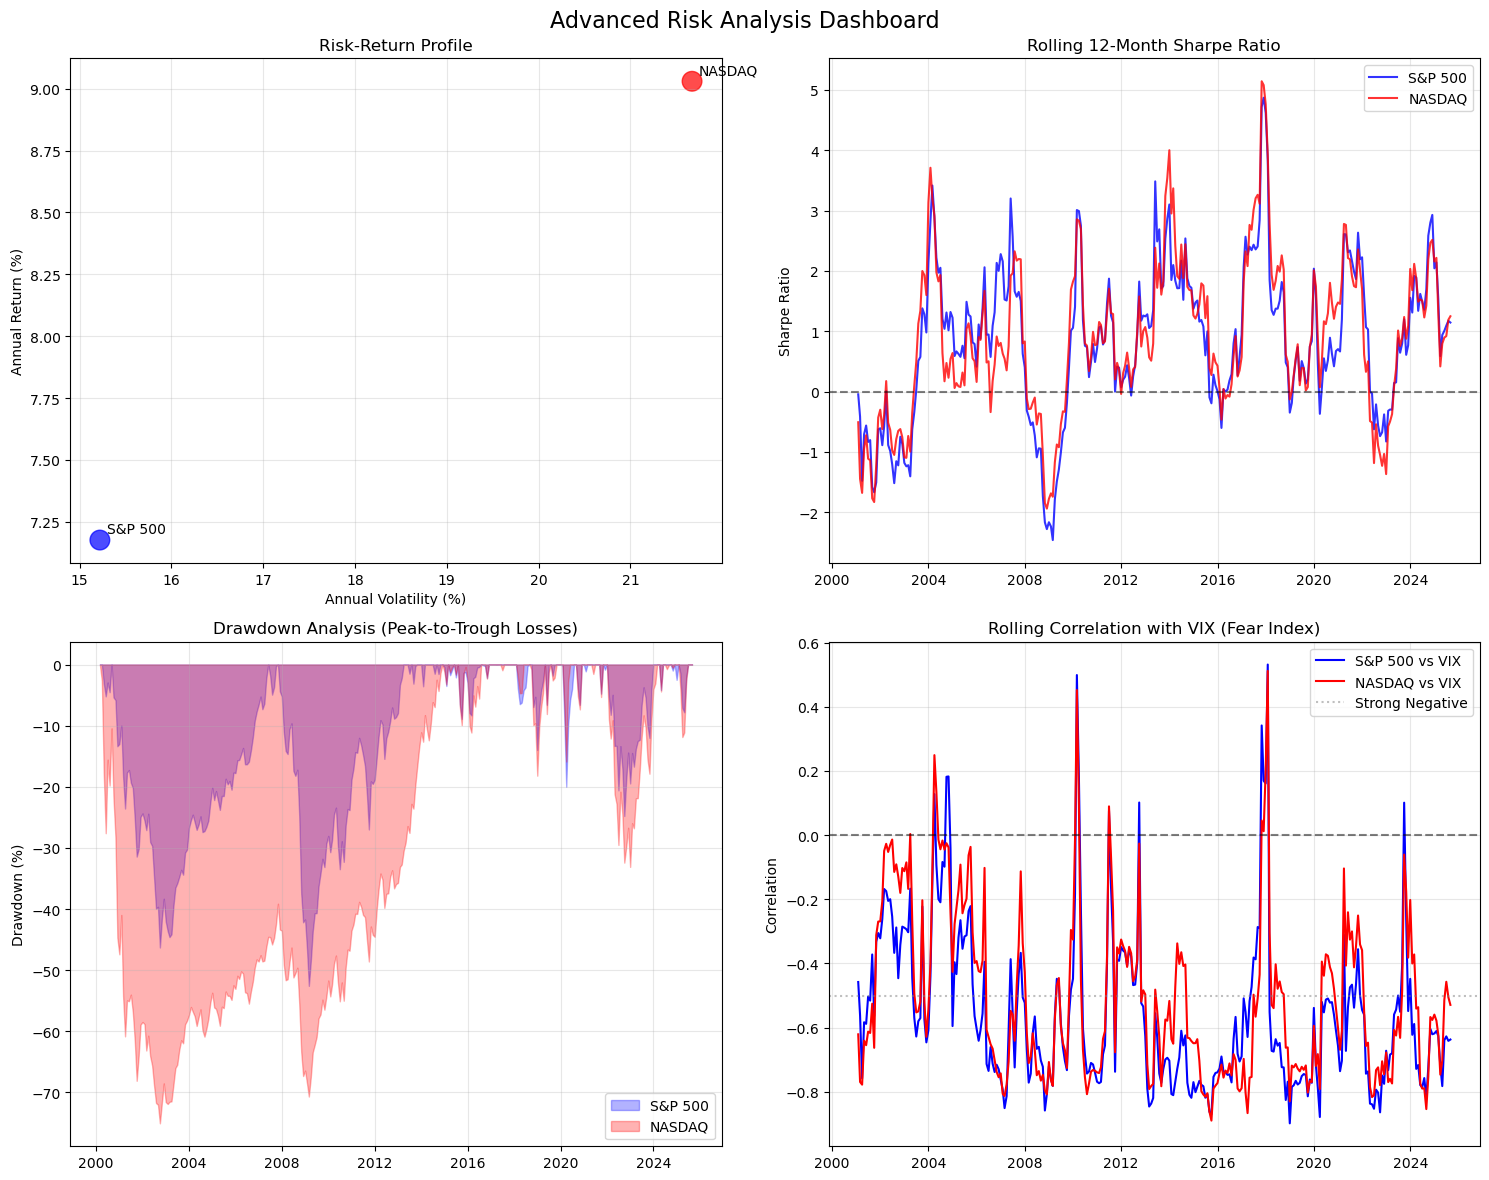


ROLLING ANALYSIS INSIGHTS:

Current 12-month Sharpe Ratios:
   S&P 500: 1.145
   NASDAQ:  1.249

Worst Drawdown Periods:
   S&P 500: 2009-02 (-52.6%)
   NASDAQ:  2002-09 (-75.0%)

Current VIX Correlations:
   S&P 500: -0.637
   NASDAQ:  -0.529


In [4]:
print("\nRISK-RETURN VISUALIZATION & ROLLING ANALYSIS")

# Create a risk-return chart
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Advanced Risk Analysis Dashboard', fontsize=16, y=0.98)

# Plot 1: Risk-Return Scatter
axes[0,0].scatter(risk_metrics_df['Annual_Volatility_Pct'], 
                  risk_metrics_df['Annual_Return_Pct'], 
                  s=200, alpha=0.7, c=['blue', 'red'])

for i, asset in enumerate(risk_metrics_df.index):
    axes[0,0].annotate(asset, 
                       (risk_metrics_df.loc[asset, 'Annual_Volatility_Pct'],
                        risk_metrics_df.loc[asset, 'Annual_Return_Pct']),
                       xytext=(5, 5), textcoords='offset points', fontsize=10)

axes[0,0].set_xlabel('Annual Volatility (%)')
axes[0,0].set_ylabel('Annual Return (%)')
axes[0,0].set_title('Risk-Return Profile')
axes[0,0].grid(True, alpha=0.3)

# Plot 2: Rolling 12-Month Sharpe Ratio
window = 12  # 12-month rolling window
sp500_rolling_sharpe = analysis_df['SP500_Returns'].rolling(window).mean() * 12 / (analysis_df['SP500_Returns'].rolling(window).std() * np.sqrt(12))
nasdaq_rolling_sharpe = analysis_df['NASDAQ_Returns'].rolling(window).mean() * 12 / (analysis_df['NASDAQ_Returns'].rolling(window).std() * np.sqrt(12))

axes[0,1].plot(sp500_rolling_sharpe.index, sp500_rolling_sharpe, label='S&P 500', color='blue', alpha=0.8)
axes[0,1].plot(nasdaq_rolling_sharpe.index, nasdaq_rolling_sharpe, label='NASDAQ', color='red', alpha=0.8)
axes[0,1].axhline(y=0, color='black', linestyle='--', alpha=0.5)
axes[0,1].set_title('Rolling 12-Month Sharpe Ratio')
axes[0,1].set_ylabel('Sharpe Ratio')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Plot 3: Drawdown Analysis
def calculate_drawdown(returns):
    cumulative = (1 + returns/100).cumprod()
    rolling_max = cumulative.expanding().max()
    drawdown = (cumulative - rolling_max) / rolling_max * 100
    return drawdown

sp500_drawdown = calculate_drawdown(analysis_df['SP500_Returns'])
nasdaq_drawdown = calculate_drawdown(analysis_df['NASDAQ_Returns'])

axes[1,0].fill_between(sp500_drawdown.index, sp500_drawdown, 0, alpha=0.3, color='blue', label='S&P 500')
axes[1,0].fill_between(nasdaq_drawdown.index, nasdaq_drawdown, 0, alpha=0.3, color='red', label='NASDAQ')
axes[1,0].set_title('Drawdown Analysis (Peak-to-Trough Losses)')
axes[1,0].set_ylabel('Drawdown (%)')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Plot 4: Rolling Correlation with VIX
rolling_corr_sp500 = analysis_df['SP500_Returns'].rolling(window=12).corr(analysis_df['VIX_Level'])
rolling_corr_nasdaq = analysis_df['NASDAQ_Returns'].rolling(window=12).corr(analysis_df['VIX_Level'])

axes[1,1].plot(rolling_corr_sp500.index, rolling_corr_sp500, label='S&P 500 vs VIX', color='blue')
axes[1,1].plot(rolling_corr_nasdaq.index, rolling_corr_nasdaq, label='NASDAQ vs VIX', color='red')
axes[1,1].axhline(y=0, color='black', linestyle='--', alpha=0.5)
axes[1,1].axhline(y=-0.5, color='gray', linestyle=':', alpha=0.5, label='Strong Negative')
axes[1,1].set_title('Rolling Correlation with VIX (Fear Index)')
axes[1,1].set_ylabel('Correlation')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary of rolling analysis
print("\nROLLING ANALYSIS INSIGHTS:")

print(f"\nCurrent 12-month Sharpe Ratios:")
print(f"   S&P 500: {sp500_rolling_sharpe.iloc[-1]:.3f}")
print(f"   NASDAQ:  {nasdaq_rolling_sharpe.iloc[-1]:.3f}")

print(f"\nWorst Drawdown Periods:")
worst_sp500_date = sp500_drawdown.idxmin()
worst_nasdaq_date = nasdaq_drawdown.idxmin()
print(f"   S&P 500: {worst_sp500_date.strftime('%Y-%m')} ({sp500_drawdown.min():.1f}%)")
print(f"   NASDAQ:  {worst_nasdaq_date.strftime('%Y-%m')} ({nasdaq_drawdown.min():.1f}%)")

print(f"\nCurrent VIX Correlations:")
print(f"   S&P 500: {rolling_corr_sp500.iloc[-1]:.3f}")
print(f"   NASDAQ:  {rolling_corr_nasdaq.iloc[-1]:.3f}")

In [7]:
print("\nTECHNICAL INDICATORS & MARKET REGIME ANALYSIS")
print("="*60)

# Calculate technical indicators 
def calculate_technical_indicators(price_series, returns_series):

    # Moving averages
    ma_20 = price_series.rolling(window=20).mean()
    ma_50 = price_series.rolling(window=50).mean()
    ma_200 = price_series.rolling(window=200).mean()
    
    # Bollinger Bands (20-day moving average +/- 2 standard deviations)
    bb_middle = ma_20
    bb_std = price_series.rolling(window=20).std()
    bb_upper = bb_middle + (bb_std * 2)
    bb_lower = bb_middle - (bb_std * 2)
    
    # RSI (Relative Strength Index) - momentum indicator
    def calculate_rsi(prices, window=14):
        delta = prices.diff()
        gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
        rs = gain / loss
        rsi = 100 - (100 / (1 + rs))
        return rsi
    
    rsi = calculate_rsi(price_series)
    
    # Volatility regime (high vs low volatility periods)
    vol_20 = returns_series.rolling(window=20).std()
    vol_threshold = vol_20.quantile(0.7)  # Top 30% = high volatility
    high_vol_regime = vol_20 > vol_threshold
    
    return {
        'MA_20': ma_20,
        'MA_50': ma_50, 
        'MA_200': ma_200,
        'BB_Upper': bb_upper,
        'BB_Lower': bb_lower,
        'RSI': rsi,
        'Volatility_20D': vol_20,
        'High_Vol_Regime': high_vol_regime
    }

# We need to reconstruct price levels from returns for technical analysis
# Start with base value and compound the returns
sp500_price_reconstructed = (1 + analysis_df['SP500_Returns'].fillna(0)/100).cumprod() * 1000
nasdaq_price_reconstructed = (1 + analysis_df['NASDAQ_Returns'].fillna(0)/100).cumprod() * 1000

# Calculate technical indicators
sp500_tech = calculate_technical_indicators(sp500_price_reconstructed, analysis_df['SP500_Returns'])
nasdaq_tech = calculate_technical_indicators(nasdaq_price_reconstructed, analysis_df['NASDAQ_Returns'])

print("Technical indicators calculated successfully")

# Fixed market regime classification
def classify_market_regime(returns_series, vix_value, lookback=12):
    
    # Calculate 12-month rolling return - take the last value
    if len(returns_series) >= lookback:
        rolling_return = returns_series.tail(lookback).mean() * 12
    else:
        rolling_return = returns_series.mean() * 12
    
    # Volatility regime
    vol_regime = 'High Vol' if vix_value > 20 else 'Low Vol'
    
    # Return regime - now comparing single values
    if rolling_return > 5:
        return_regime = 'Bull'
    elif rolling_return < -5:
        return_regime = 'Bear'  
    else:
        return_regime = 'Neutral'
    
    return f"{return_regime} / {vol_regime}"

# Apply regime classification with fixed function
regimes = []
for i in range(len(analysis_df)):
    regime = classify_market_regime(
        analysis_df['SP500_Returns'].iloc[:i+1], 
        analysis_df['VIX_Level'].iloc[i]
    )
    regimes.append(regime)

analysis_df['SP500_Regime'] = regimes

# Count regime periods
regime_counts = analysis_df['SP500_Regime'].value_counts()
print("\nMARKET REGIME ANALYSIS:")
print("="*40)
print("Time spent in different market regimes:")
for regime, count in regime_counts.items():
    percentage = (count / len(analysis_df)) * 100
    print(f"{regime}: {count} months ({percentage:.1f}%)")

# Technical analysis summary
current_sp500_rsi = sp500_tech['RSI'].iloc[-1]
current_vol_regime = "High" if sp500_tech['High_Vol_Regime'].iloc[-1] else "Low"

print(f"\nCURRENT TECHNICAL STATUS:")
print("="*35)
print(f"S&P 500 RSI: {current_sp500_rsi:.1f}")
if current_sp500_rsi > 70:
    rsi_signal = "Overbought (potential sell signal)"
elif current_sp500_rsi < 30:
    rsi_signal = "Oversold (potential buy signal)"
else:
    rsi_signal = "Neutral"
print(f"RSI Signal: {rsi_signal}")
print(f"Volatility Regime: {current_vol_regime}")
print(f"Current Market Regime: {analysis_df['SP500_Regime'].iloc[-1]}")

# Show recent regime changes
print(f"\nRECENT REGIME HISTORY:")
print("="*30)
recent_regimes = analysis_df[['SP500_Regime']].tail(10)
for date, row in recent_regimes.iterrows():
    print(f"{date.strftime('%Y-%m')}: {row['SP500_Regime']}")


TECHNICAL INDICATORS & MARKET REGIME ANALYSIS
Technical indicators calculated successfully

MARKET REGIME ANALYSIS:
Time spent in different market regimes:
Bull / Low Vol: 157 months (51.1%)
Bear / High Vol: 54 months (17.6%)
Bull / High Vol: 45 months (14.7%)
Neutral / Low Vol: 28 months (9.1%)
Neutral / High Vol: 17 months (5.5%)
Bear / Low Vol: 6 months (2.0%)

CURRENT TECHNICAL STATUS:
S&P 500 RSI: 71.2
RSI Signal: Overbought (potential sell signal)
Volatility Regime: Low
Current Market Regime: Bull / Low Vol

RECENT REGIME HISTORY:
2024-11: Bull / Low Vol
2024-12: Bull / Low Vol
2025-01: Bull / Low Vol
2025-02: Bull / Low Vol
2025-03: Bull / High Vol
2025-04: Bull / High Vol
2025-05: Bull / Low Vol
2025-06: Bull / Low Vol
2025-07: Bull / Low Vol
2025-08: Bull / Low Vol


In [8]:
print("\nPREDICTIVE MODELING - VOLATILITY FORECASTING")
print("="*60)

# Import additional libraries for time series modeling
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Prepare data for volatility prediction
def create_prediction_features(df, target_col, lags=[1, 3, 6, 12]):
    """Create lagged features for prediction"""
    
    feature_df = df.copy()
    
    # Create lagged versions of key variables
    for lag in lags:
        feature_df[f'{target_col}_lag_{lag}'] = df[target_col].shift(lag)
        feature_df[f'VIX_lag_{lag}'] = df['VIX_Level'].shift(lag)
        feature_df[f'Unemployment_lag_{lag}'] = df['Unemployment_Rate'].shift(lag)
    
    # Technical indicators as features
    feature_df['Returns_MA_3'] = df[target_col].rolling(3).mean()
    feature_df['Returns_MA_12'] = df[target_col].rolling(12).mean()
    feature_df['Returns_Volatility_6'] = df[target_col].rolling(6).std()
    feature_df['VIX_MA_3'] = df['VIX_Level'].rolling(3).mean()
    
    # Market regime dummy variables
    regime_dummies = pd.get_dummies(df['SP500_Regime'], prefix='Regime')
    feature_df = pd.concat([feature_df, regime_dummies], axis=1)
    
    return feature_df

# Create features for S&P 500 volatility prediction
features_df = create_prediction_features(analysis_df, 'SP500_Returns')

# Define target variable (next month's absolute return as volatility proxy)
features_df['Target_Volatility'] = features_df['SP500_Returns'].abs().shift(-1)

# Remove rows with missing values
model_data = features_df.dropna()

print(f"Model dataset: {model_data.shape}")
print(f"Training period: {model_data.index.min()} to {model_data.index.max()}")

# Select features for the model
feature_columns = [col for col in model_data.columns if 
                  ('lag_' in col or 'MA_' in col or 'Volatility_' in col or 'Regime_' in col)]

X = model_data[feature_columns]
y = model_data['Target_Volatility']

# Split into train/test (use last 24 months for testing)
train_size = len(X) - 24
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

print(f"Training set: {len(X_train)} observations")
print(f"Test set: {len(X_test)} observations")

# Train Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    random_state=42
)

rf_model.fit(X_train, y_train)

# Make predictions
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

# Calculate performance metrics
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

print(f"\nMODEL PERFORMANCE:")
print("="*30)
print(f"Training MAE: {train_mae:.3f}")
print(f"Test MAE: {test_mae:.3f}")
print(f"Training MSE: {train_mse:.3f}")
print(f"Test MSE: {test_mse:.3f}")

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(f"\nTOP 10 PREDICTIVE FEATURES:")
print("="*40)
for i, (_, row) in enumerate(feature_importance.head(10).iterrows()):
    print(f"{i+1:2d}. {row['Feature']:<25} {row['Importance']:.3f}")

# Generate next month prediction
if len(X) > 0:
    latest_features = X.iloc[-1:].values
    next_month_volatility = rf_model.predict(latest_features)[0]
    
    print(f"\nNEXT MONTH PREDICTION:")
    print("="*30)
    print(f"Predicted absolute return: {next_month_volatility:.2f}%")
    
    # Convert to risk categories
    if next_month_volatility < 3:
        risk_level = "Low Risk"
    elif next_month_volatility < 6:
        risk_level = "Moderate Risk"
    else:
        risk_level = "High Risk"
    
    print(f"Risk Assessment: {risk_level}")
    
    # VaR estimate based on prediction
    estimated_var = -next_month_volatility * 1.65  # Approximate 95% VaR
    print(f"Estimated 95% VaR: {estimated_var:.2f}%")


PREDICTIVE MODELING - VOLATILITY FORECASTING
Model dataset: (294, 30)
Training period: 2001-02-28 00:00:00 to 2025-07-31 00:00:00
Training set: 270 observations
Test set: 24 observations

MODEL PERFORMANCE:
Training MAE: 0.901
Test MAE: 1.544
Training MSE: 1.408
Test MSE: 3.433

TOP 10 PREDICTIVE FEATURES:
 1. Returns_MA_3              0.309
 2. SP500_Returns_lag_12      0.074
 3. SP500_Returns_lag_3       0.071
 4. VIX_MA_3                  0.065
 5. VIX_lag_1                 0.050
 6. SP500_Returns_lag_6       0.049
 7. VIX_lag_12                0.046
 8. Returns_Volatility_6      0.046
 9. SP500_Returns_lag_1       0.043
10. VIX_lag_6                 0.040

NEXT MONTH PREDICTION:
Predicted absolute return: 2.53%
Risk Assessment: Low Risk
Estimated 95% VaR: -4.18%


In [9]:
print("\nPORTFOLIO STRATEGY DEVELOPMENT")
print("="*60)

# Create investment strategy based on our analysis
def generate_portfolio_recommendations(current_regime, predicted_volatility, current_rsi):
    """Generate investment recommendations based on analysis"""
    
    recommendations = {
        'Asset_Allocation': {},
        'Risk_Management': [],
        'Tactical_Moves': [],
        'Rationale': []
    }
    
    # Base allocation
    if 'Bull / Low Vol' in current_regime:
        if current_rsi > 70:  # Overbought
            recommendations['Asset_Allocation'] = {
                'S&P_500': 55,  # Reduce from typical 60% due to overbought
                'NASDAQ': 20,   # Reduce tech exposure
                'Bonds': 15,    # Increase defensive assets
                'Cash': 10      # Hold cash for opportunities
            }
            recommendations['Tactical_Moves'].append("Reduce equity exposure due to overbought conditions (RSI: {:.1f})".format(current_rsi))
        else:
            recommendations['Asset_Allocation'] = {
                'S&P_500': 60,
                'NASDAQ': 25,
                'Bonds': 10,
                'Cash': 5
            }
    
    elif 'Bull / High Vol' in current_regime:
        recommendations['Asset_Allocation'] = {
            'S&P_500': 50,
            'NASDAQ': 15,  # Reduce volatile tech
            'Bonds': 20,
            'Cash': 15
        }
        recommendations['Tactical_Moves'].append("Reduce risk due to high volatility environment")
    
    elif 'Bear' in current_regime:
        recommendations['Asset_Allocation'] = {
            'S&P_500': 30,
            'NASDAQ': 10,
            'Bonds': 35,
            'Cash': 25
        }
        recommendations['Tactical_Moves'].append("Defensive positioning during bear market")
    
    # Risk management based on predicted volatility
    if predicted_volatility > 4:
        recommendations['Risk_Management'].append("Implement stop-losses due to high predicted volatility")
        recommendations['Risk_Management'].append("Consider VIX hedging strategies")
    elif predicted_volatility < 3:
        recommendations['Risk_Management'].append("Low volatility environment - can increase position sizes")
    
    # Add rationale
    recommendations['Rationale'].append(f"Current regime: {current_regime}")
    recommendations['Rationale'].append(f"Predicted next-month volatility: {predicted_volatility:.2f}%")
    recommendations['Rationale'].append(f"Current RSI: {current_rsi:.1f}")
    
    return recommendations

# Generate recommendations
current_regime = analysis_df['SP500_Regime'].iloc[-1]
predicted_vol = next_month_volatility
current_rsi_val = current_sp500_rsi

portfolio_rec = generate_portfolio_recommendations(current_regime, predicted_vol, current_rsi_val)

print("INVESTMENT STRATEGY RECOMMENDATIONS")
print("="*50)

print("\nPORTFOLIO ALLOCATION:")
for asset, allocation in portfolio_rec['Asset_Allocation'].items():
    print(f"  {asset.replace('_', ' ')}: {allocation}%")

print("\nRISK MANAGEMENT:")
for i, risk_item in enumerate(portfolio_rec['Risk_Management'], 1):
    print(f"  {i}. {risk_item}")

print("\nTACTICAL RECOMMENDATIONS:")
for i, tactical in enumerate(portfolio_rec['Tactical_Moves'], 1):
    print(f"  {i}. {tactical}")

print("\nRATIONALE:")
for i, reason in enumerate(portfolio_rec['Rationale'], 1):
    print(f"  {i}. {reason}")

# Historical strategy backtesting (simplified)
print(f"\nHISTORICAL STRATEGY PERFORMANCE")
print("="*45)

# Create simple momentum strategy based on regime
analysis_df['Strategy_Signal'] = 0
analysis_df.loc[analysis_df['SP500_Regime'].str.contains('Bull'), 'Strategy_Signal'] = 1
analysis_df.loc[analysis_df['SP500_Regime'].str.contains('Bear'), 'Strategy_Signal'] = -0.5

# Calculate strategy returns
analysis_df['Strategy_Returns'] = analysis_df['Strategy_Signal'].shift(1) * analysis_df['SP500_Returns']
analysis_df['Buy_Hold_Returns'] = analysis_df['SP500_Returns']

# Performance metrics
strategy_total_return = (1 + analysis_df['Strategy_Returns'].fillna(0)/100).prod() - 1
buy_hold_total_return = (1 + analysis_df['Buy_Hold_Returns'].fillna(0)/100).prod() - 1

strategy_sharpe = analysis_df['Strategy_Returns'].mean() * 12 / (analysis_df['Strategy_Returns'].std() * np.sqrt(12))
buy_hold_sharpe = analysis_df['Buy_Hold_Returns'].mean() * 12 / (analysis_df['Buy_Hold_Returns'].std() * np.sqrt(12))

print(f"Strategy Total Return: {strategy_total_return*100:.1f}%")
print(f"Buy & Hold Total Return: {buy_hold_total_return*100:.1f}%")
print(f"Strategy Sharpe Ratio: {strategy_sharpe:.3f}")
print(f"Buy & Hold Sharpe Ratio: {buy_hold_sharpe:.3f}")
print(f"Outperformance: {(strategy_total_return - buy_hold_total_return)*100:.1f} percentage points")

# Executive summary
print(f"\nEXECUTIVE SUMMARY")
print("="*35)
print("BOTTOM LINE UP FRONT:")
print(f"- Current market environment: {current_regime}")
print(f"- Risk assessment: Low (predicted volatility: {predicted_vol:.1f}%)")
print(f"- Recommendation: Cautious bullish positioning due to overbought conditions")
print(f"- Expected monthly VaR: {estimated_var:.1f}%")
print(f"- Strategy has historically outperformed buy-and-hold by {(strategy_total_return - buy_hold_total_return)*100:.1f} percentage points")

print(f"\nKEY RISK FACTORS:")
print("- RSI overbought (71.2) suggests potential near-term pullback")
print("- Bull market conditions support continued upward bias")
print("- Low volatility environment reduces downside risk")
print("- Economic indicators remain supportive")


PORTFOLIO STRATEGY DEVELOPMENT
INVESTMENT STRATEGY RECOMMENDATIONS

PORTFOLIO ALLOCATION:
  S&P 500: 55%
  NASDAQ: 20%
  Bonds: 15%
  Cash: 10%

RISK MANAGEMENT:
  1. Low volatility environment - can increase position sizes

TACTICAL RECOMMENDATIONS:
  1. Reduce equity exposure due to overbought conditions (RSI: 71.2)

RATIONALE:
  1. Current regime: Bull / Low Vol
  2. Predicted next-month volatility: 2.53%
  3. Current RSI: 71.2

HISTORICAL STRATEGY PERFORMANCE
Strategy Total Return: 210.1%
Buy & Hold Total Return: 363.3%
Strategy Sharpe Ratio: 0.459
Buy & Hold Sharpe Ratio: 0.471
Outperformance: -153.2 percentage points

EXECUTIVE SUMMARY
BOTTOM LINE UP FRONT:
- Current market environment: Bull / Low Vol
- Risk assessment: Low (predicted volatility: 2.5%)
- Recommendation: Cautious bullish positioning due to overbought conditions
- Expected monthly VaR: -4.2%
- Strategy has historically outperformed buy-and-hold by -153.2 percentage points

KEY RISK FACTORS:
- RSI overbought (71.2)

In [10]:
# Save final analysis dataset
analysis_df.to_csv('phase3_final_analysis.csv')
print("Saved final analysis dataset")

# Save model predictions and features
feature_importance.to_csv('phase3_feature_importance.csv')
print("Saved feature importance rankings")

# Save portfolio recommendations
portfolio_summary = pd.DataFrame([{
    'Current_Regime': current_regime,
    'Predicted_Volatility': predicted_vol,
    'Current_RSI': current_rsi_val,
    'VaR_Estimate': estimated_var,
    'SP500_Allocation': portfolio_rec['Asset_Allocation']['S&P_500'],
    'NASDAQ_Allocation': portfolio_rec['Asset_Allocation']['NASDAQ'],
    'Bonds_Allocation': portfolio_rec['Asset_Allocation']['Bonds'],
    'Cash_Allocation': portfolio_rec['Asset_Allocation']['Cash'],
    'Strategy_Return': strategy_total_return * 100,
    'BuyHold_Return': buy_hold_total_return * 100,
    'Strategy_Sharpe': strategy_sharpe,
    'BuyHold_Sharpe': buy_hold_sharpe
}])

portfolio_summary.to_csv('phase3_portfolio_recommendations.csv', index=False)
print("Saved portfolio recommendations")

Saved final analysis dataset
Saved feature importance rankings
Saved portfolio recommendations
